# Case

**Fomos contratados por um banco para analisar os dados e dividir os clientes em pelo menos 3 grupos**

- Um dos pontos cruciais de marketing é conhecer os clientes e identificar suas necessidades.
- Entendendo os consumidores podemos enviar campanhas específicas para necessidades específicas.
- Se dados sobre os clientes estão disponíveis, podemos aplicar Ciência de Dados para segmentar o mercado.

## Atributos da base de dados

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Importações

In [41]:
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

## Visualização e exploração dos dados

In [53]:
df = pd.read_csv('../bases_de_dados/Marketing_data.csv')

In [54]:
df.shape

(8950, 18)

In [55]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# cliente que fez a maior compra a vista
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [13]:
# cliente que fez a maior compra no credito
df[df['CASH_ADVANCE'] == df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


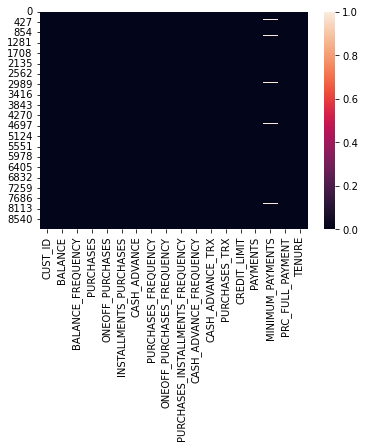

In [14]:
sns.heatmap(df.isnull());

In [15]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Nossa base de dados possuí alguns valores nulos, precisamos tratá-los.**

In [56]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [57]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [58]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [59]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [60]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Valores nulos foram tratados com sucesso. Agora vamos verificar se temos valores duplicados. Por exemplo, o mesmo cliente duas vezes.**

In [61]:
df.duplicated().sum()

0

**Agora vamos apagar a coluna de ID do cliente, pois ela não é um atributo necessário para o agrupamento.**

In [62]:
df.drop('CUST_ID', axis=1, inplace=True)

In [63]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


**Feito isso, vamos visualizar nossos dados de forma gráfica.**

In [66]:
colunas = df.columns
len(colunas)


17

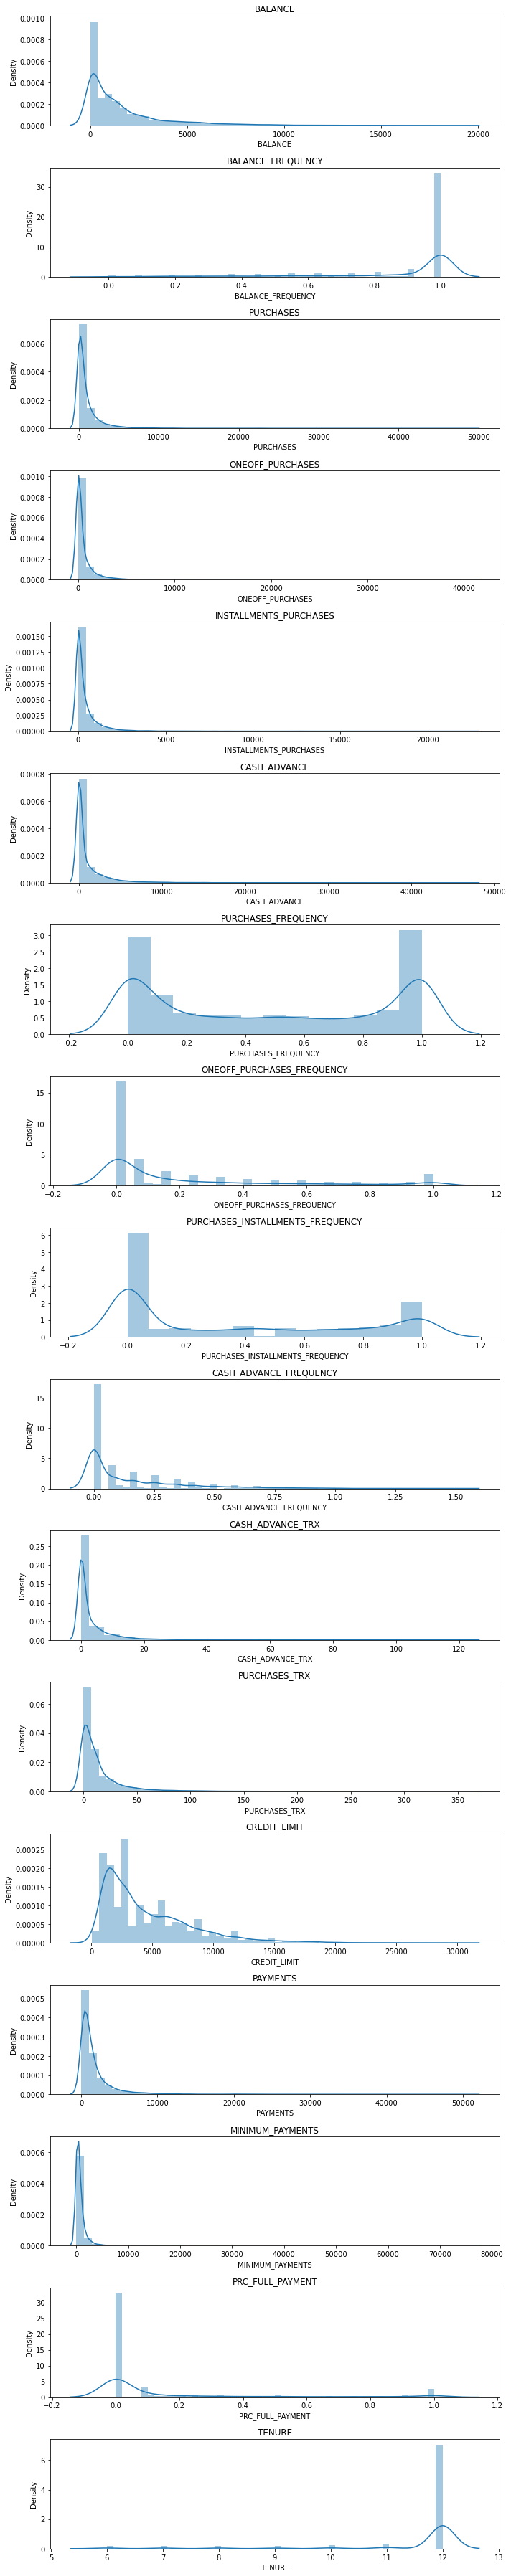

In [67]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 50))

for i in range(len(colunas)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde=True);
    plt.title(df.columns[i])
    
plt.tight_layout();

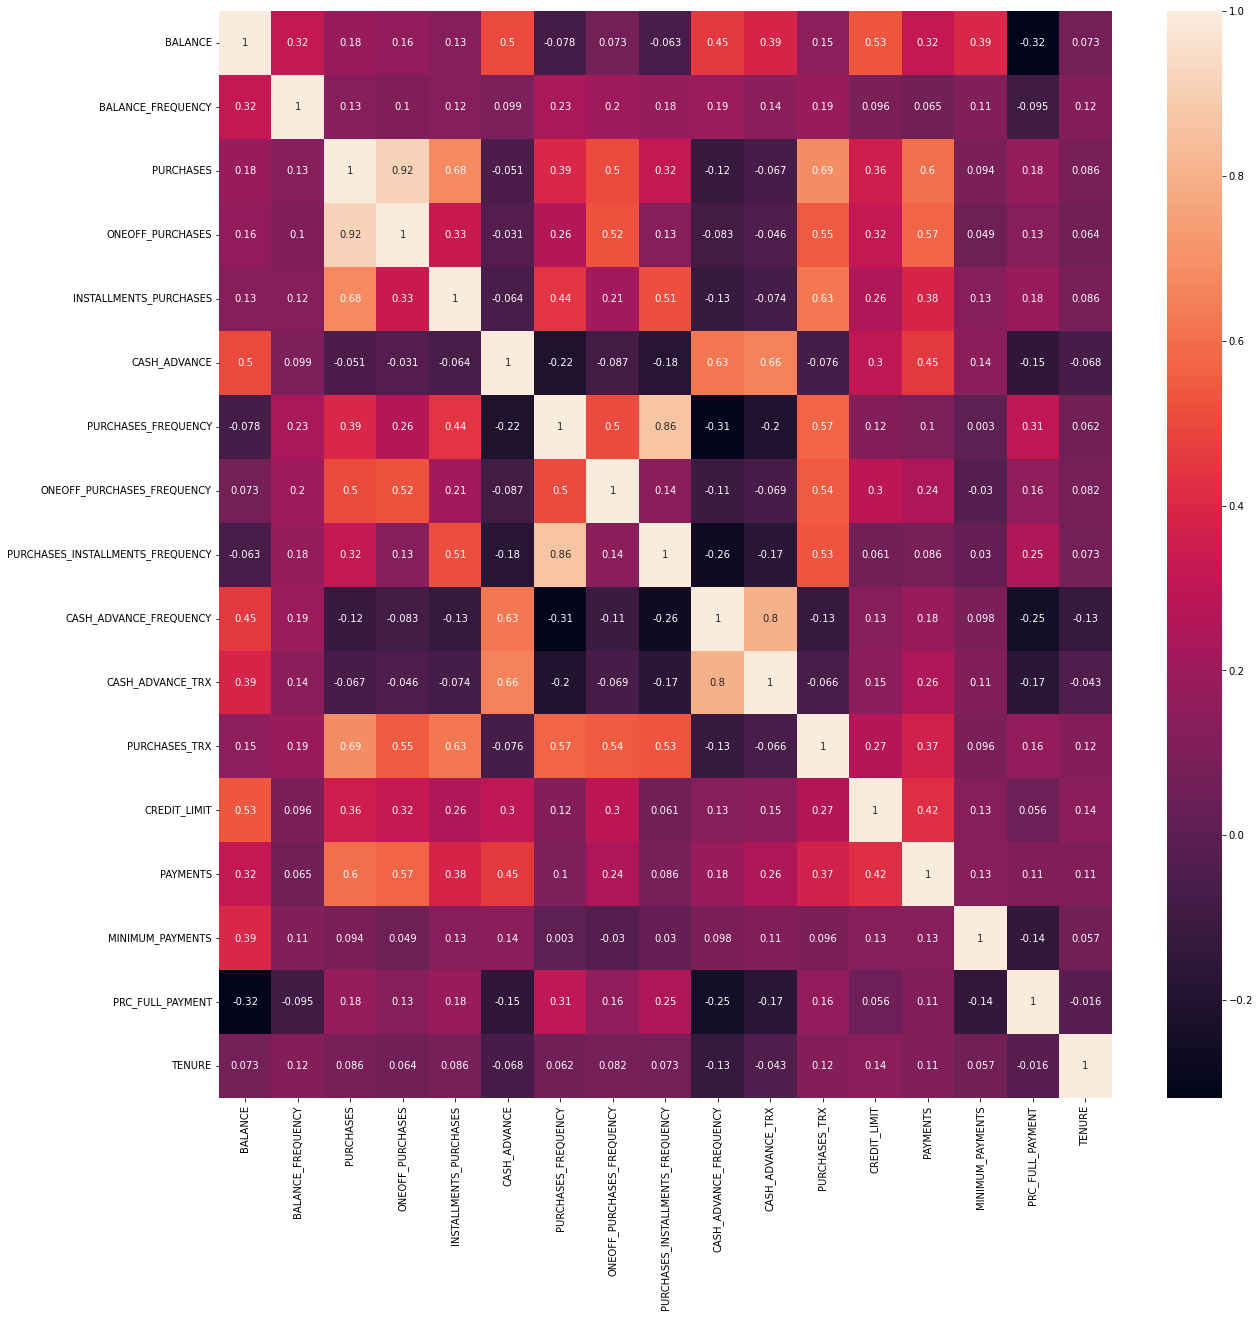

In [46]:
correlations = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

In [47]:
min(df['BALANCE']), max(df['BALANCE'])

(0.0, 19043.13856)

**Podemos observar que nossos dados não estão normalizados. Isso pode gerar uma imprecisão no nosso modelo. Por isso, vamos normalizar nossa base de dados.**

In [48]:
# z = (x - u) / std

scaler = StandardScaler()

In [68]:
scaled_df = scaler.fit_transform(df)

In [74]:
scaled_df[0].min(), scaled_df[0].max()

(-0.9604333444542572, 0.36067954425377496)

In [75]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [76]:
wcss1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    wcss1.append(kmeans.inertia_)

In [77]:
print(wcss1)

[152150.0000000002, 127785.22351398248, 111986.36616291184, 99073.93826774828, 91502.92043249548, 84851.13240432595, 79527.63877135876, 74491.15197795516, 69955.35886016175, 66485.44890768969, 63632.90840599966, 61380.697181648306, 59177.405766559634, 57463.62351149159, 55940.223363410776, 54652.38164653152, 53439.27310110777, 51945.71736440713, 51003.542385681125]


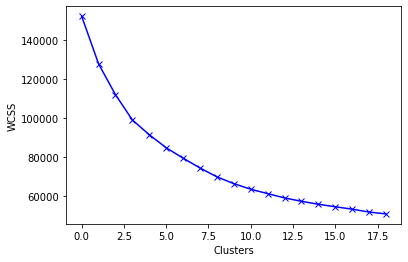

In [81]:
plt.plot(wcss1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com K-means

In [87]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled_df)
labels = kmeans.labels_

In [88]:
labels, len(labels)

(array([4, 1, 0, ..., 3, 3, 3]), 8950)

In [89]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1120,  885, 1182,  624, 2746,  364,   25, 2004], dtype=int64))

In [100]:
kmeans.cluster_centers_

array([[-1.37490781e-01,  3.99709520e-01,  5.39895501e-01,
         6.69618831e-01,  4.61852694e-02, -3.30895920e-01,
         9.79122751e-01,  1.90244240e+00,  1.69309194e-01,
        -4.15384403e-01, -3.32150613e-01,  6.15861940e-01,
         4.30953628e-01,  1.43559344e-01, -1.59248392e-01,
         4.49132574e-01,  2.68608755e-01],
       [ 1.66200109e+00,  3.95864367e-01, -2.26160290e-01,
        -1.61566802e-01, -2.37991441e-01,  1.98994286e+00,
        -4.89282072e-01, -2.14947759e-01, -4.28316003e-01,
         1.91622821e+00,  1.91393595e+00, -2.75932442e-01,
         1.00770279e+00,  7.89818892e-01,  5.16197777e-01,
        -3.95590419e-01,  7.34086939e-02],
       [-7.00917863e-01, -2.14373502e+00, -3.10467931e-01,
        -2.35060189e-01, -3.02134890e-01, -3.19880248e-01,
        -5.55386654e-01, -4.43244296e-01, -4.39618067e-01,
        -5.20752866e-01, -3.76147695e-01, -4.19400274e-01,
        -1.72441026e-01, -1.91641823e-01, -2.56427163e-01,
         2.84812939e-01,  2.0

In [101]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [102]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.137491,0.399710,0.539896,0.669619,0.046185,-0.330896,0.979123,1.902442,0.169309,-0.415384,-0.332151,0.615862,0.430954,0.143559,-0.159248,0.449133,0.268609
1,1.662001,0.395864,-0.226160,-0.161567,-0.237991,1.989943,-0.489282,-0.214948,-0.428316,1.916228,1.913936,-0.275932,1.007703,0.789819,0.516198,-0.395590,0.073409
2,-0.700918,-2.143735,-0.310468,-0.235060,-0.302135,-0.319880,-0.555387,-0.443244,-0.439618,-0.520753,-0.376148,-0.419400,-0.172441,-0.191642,-0.256427,0.284813,0.200105
3,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691
4,0.006791,0.403585,-0.356116,-0.241087,-0.399001,-0.103055,-0.848121,-0.392588,-0.751101,0.089333,-0.038331,-0.480265,-0.307989,-0.253879,-0.012432,-0.456080,0.274082
5,1.055994,0.468427,2.432260,1.771826,2.495934,-0.147328,1.168536,1.535165,1.279606,-0.272765,-0.143949,3.075885,1.274951,1.426513,0.731971,0.238241,0.338098
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,-0.365197,0.332087,-0.035242,-0.242433,0.361875,-0.363358,0.996791,-0.384078,1.209615,-0.472970,-0.359733,0.190486,-0.260363,-0.215541,-0.051569,0.318772,0.255529


In [103]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [104]:
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)

**Aqui nós temos os centroides, que indicam os valores medios de cada cluster.**

In [106]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1278.299373,0.971958,2156.699893,1703.867482,452.832411,284.966910,0.883320,0.769993,0.431725,0.052022,0.982143,30.017857,6062.435065,2148.734088,493.084883,0.285078,11.876786
1,5023.789800,0.971047,520.009887,324.269572,195.854938,5151.874247,0.293978,0.138335,0.194214,0.518601,16.310034,7.851184,8160.884493,4019.592155,2067.183687,0.038011,11.615558
2,105.573461,0.369440,339.885313,202.285601,137.850812,308.067290,0.267447,0.070229,0.189722,0.030936,0.681895,4.285110,3867.038447,1178.359551,266.613855,0.237018,11.785110
3,869.441195,0.795307,387.463654,236.537740,151.406683,1120.452630,0.408737,0.116973,0.274915,0.196992,3.254808,5.068910,2445.535977,596.186218,376.937132,0.157627,7.233974
4,1578.609835,0.972876,242.358294,192.283090,50.255554,762.759871,0.149959,0.085341,0.065931,0.153021,2.987245,2.772230,3373.858115,998.188985,835.234925,0.020319,11.884111
5,3762.436640,0.988237,6199.766676,3533.304973,2668.110055,669.916456,0.959341,0.660427,0.872985,0.080561,2.266484,91.164835,9133.241758,5862.758729,2570.034179,0.223396,11.969780
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,804.347676,0.955939,927.909127,190.048089,738.306786,216.891879,0.890411,0.087880,0.845169,0.040498,0.793912,19.444611,3547.140819,1109.174164,744.028190,0.246950,11.859281


**Analisando a tabela acima temos que:**

- **Grupo 6** (VIP/Prime): limite do cartão alto (16360) e o mais alto percentual de pagamento da fatura completa (0.49). Também é o grupo que mais possuí dinheiro na conta corrente. Aumentar o limite do cartão e incentivar o hábito de compras.

- **Grupo 2**: Mantém pouco dinheiro na conta corrente. Possuem a menor frequência de pagamentos a vista (0.07). Não sacam muito dinheiro do limite do cartão (618), consequentemente possuem a menor frequência de saque do limite (0.03). Dentre todos os grupos são os que pagam a fatura do cartão com os valores mais baixos. 23% de pagamento da fatura completa do cartão de crédito.

- **Grupo 1**: usam o cartão de crédito como 'empréstimo' (setor mais lucrativo para o banco), 2º grupo em valor na conta corrente. Possuem o 3º maior limite do cartão de crédito (8160). É o grupo que menos paga a fatura completa, apenas 3% pagam. Pode ser um grupo arriscado, pois parecem pagar pouco e gastar muito.

- **Grupo 3**: grupo com os clientes mais recentes (7 anos). Mantém pouco dinheiro na conta corrente (869).

**É ideal que essa análise seja feita com alguém da área, por exemplo, o gerente do banco, para ajudar a encontrar relações que talvez o cientista de dados não enxergue.**

In [107]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

In [108]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


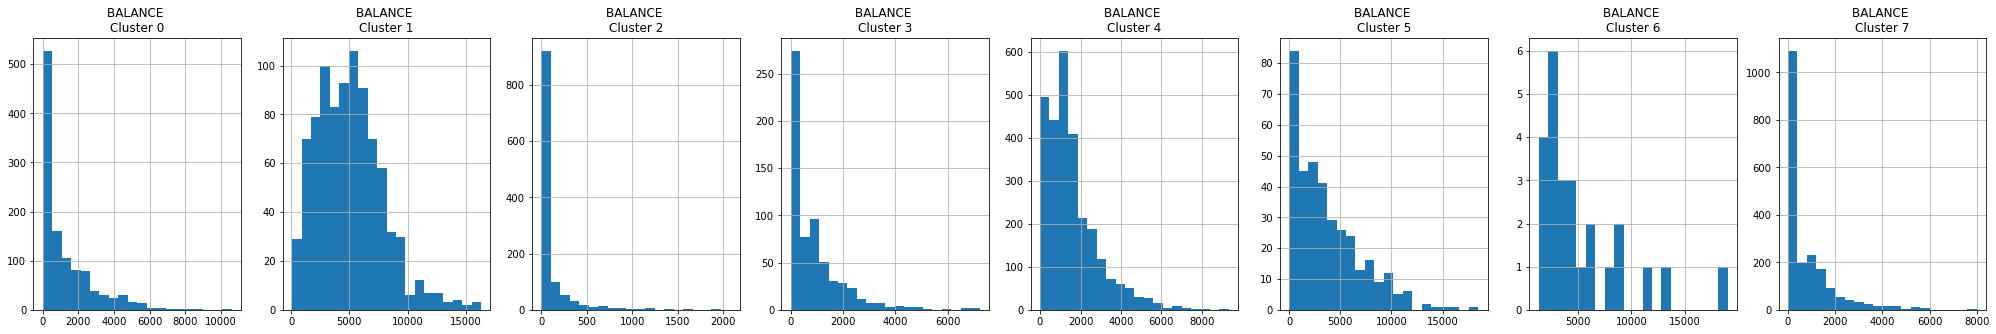

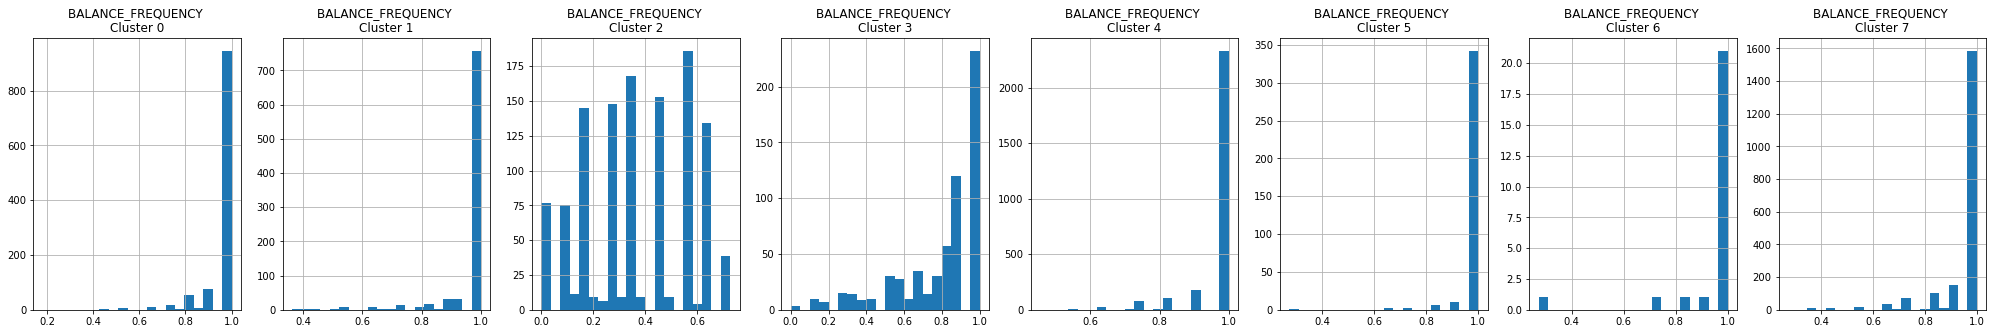

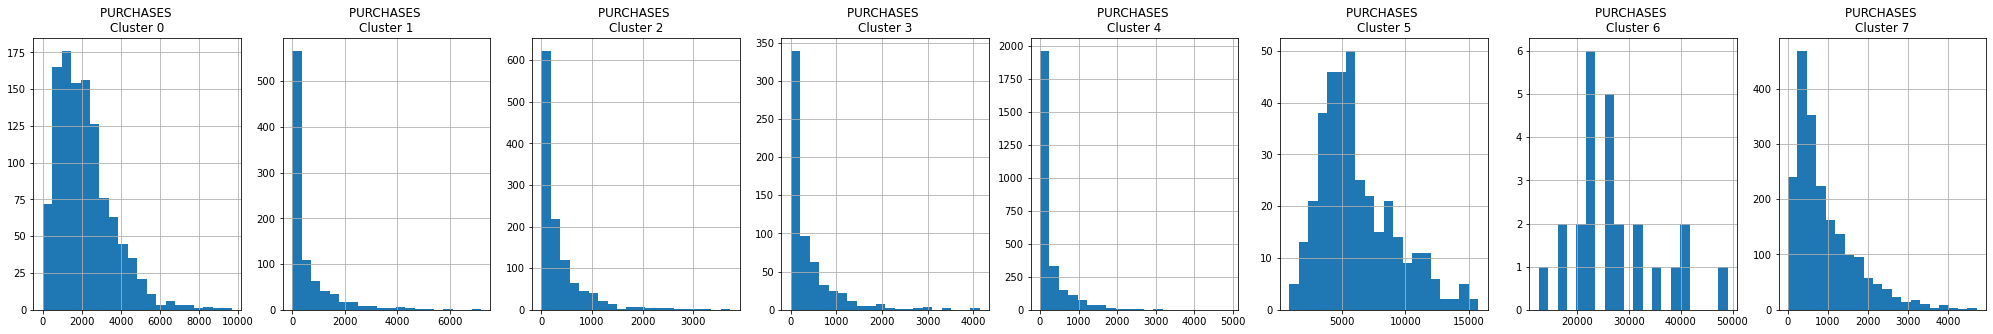

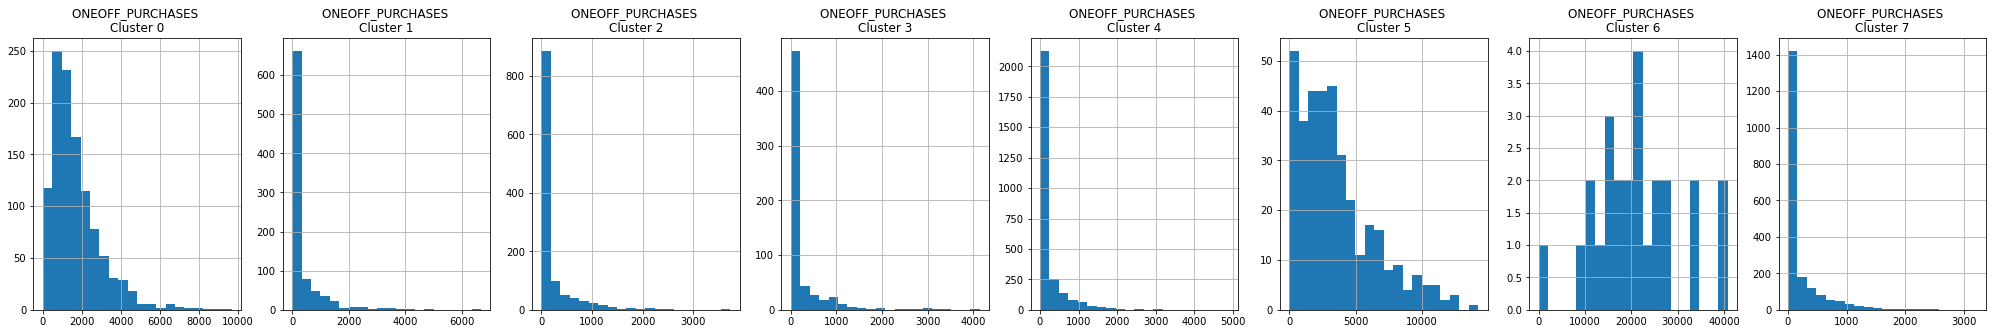

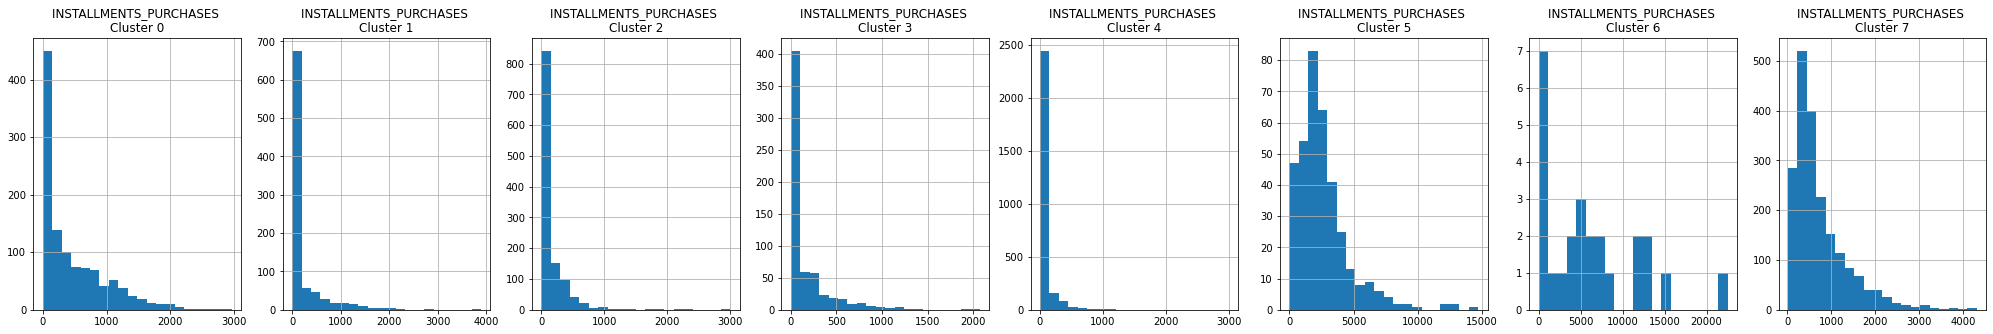

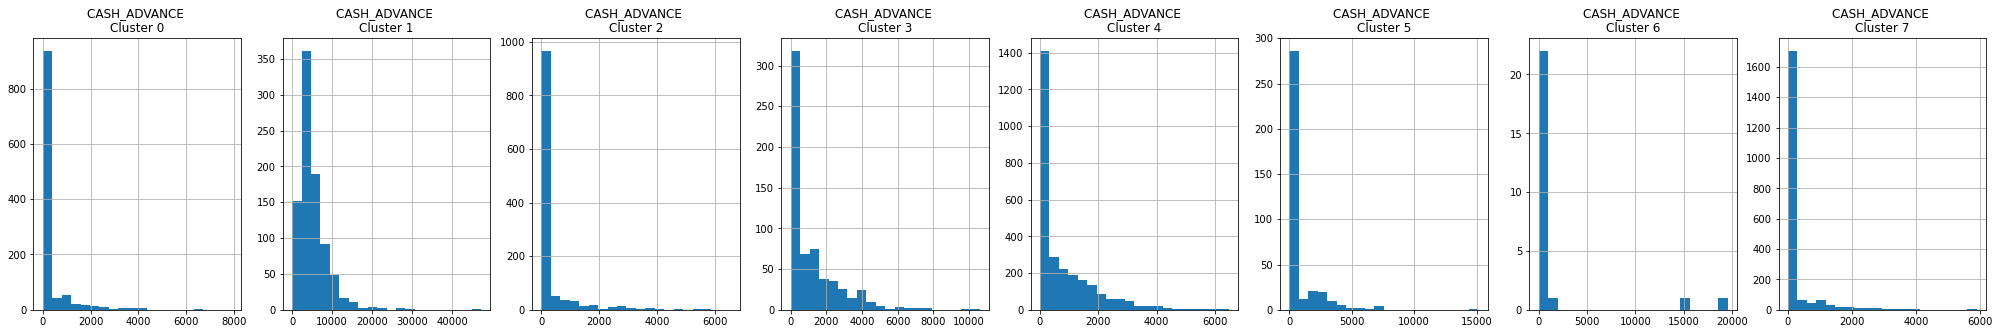

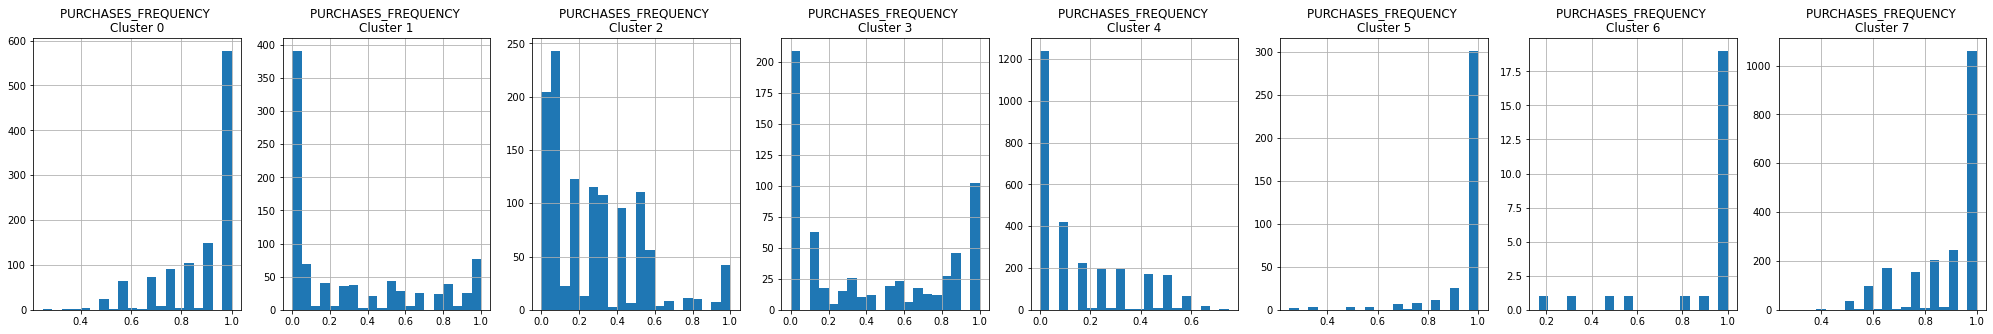

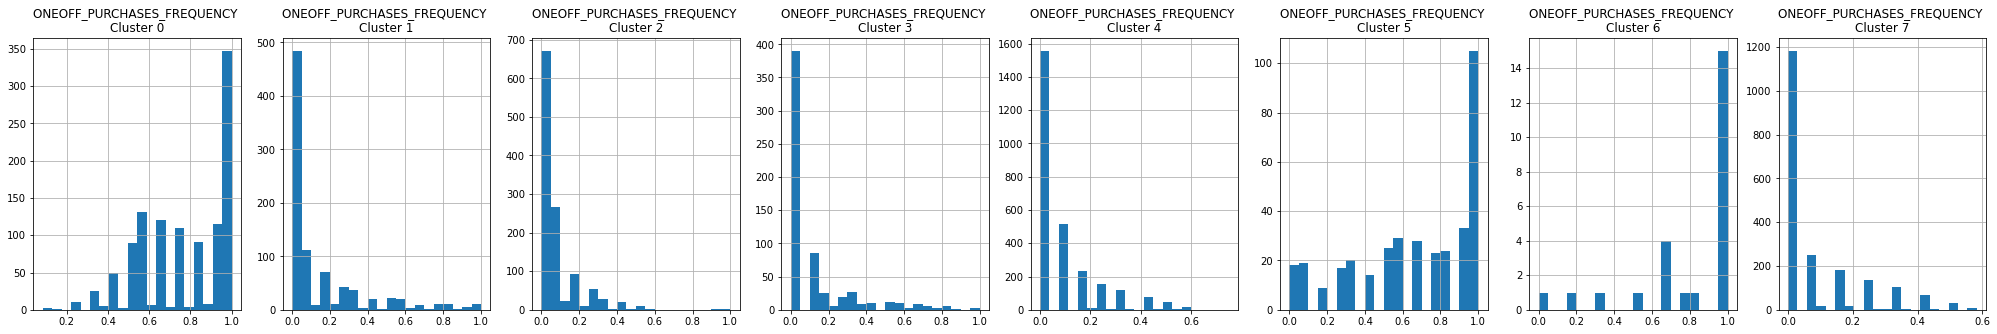

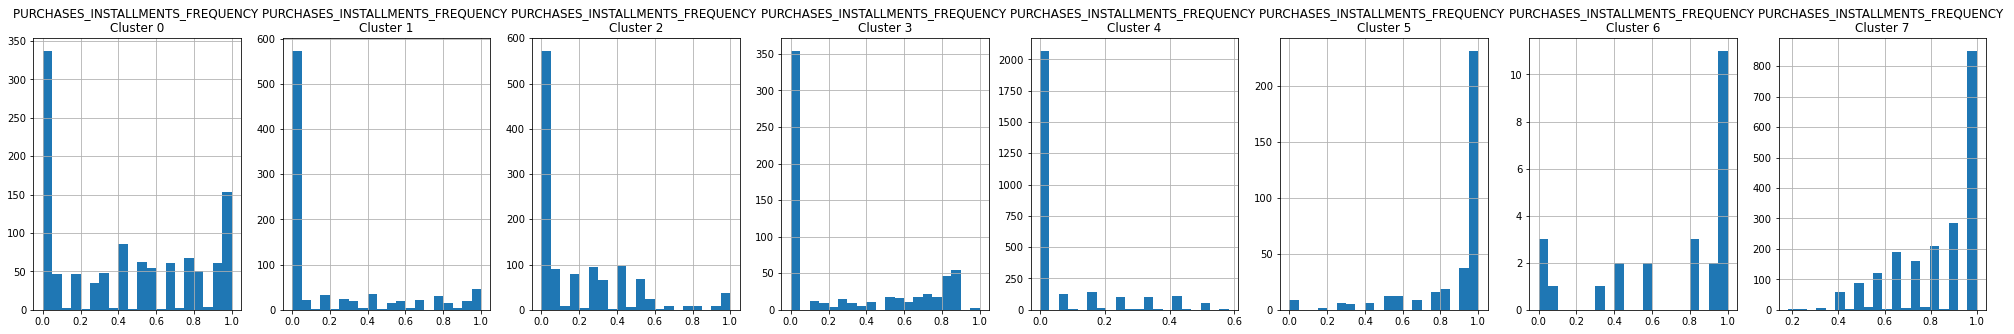

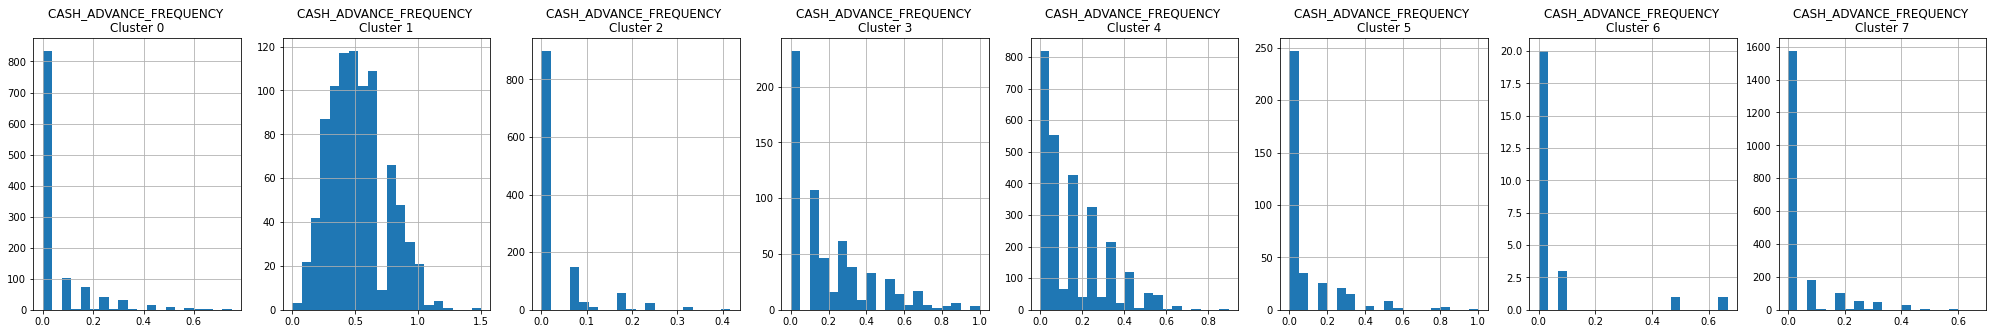

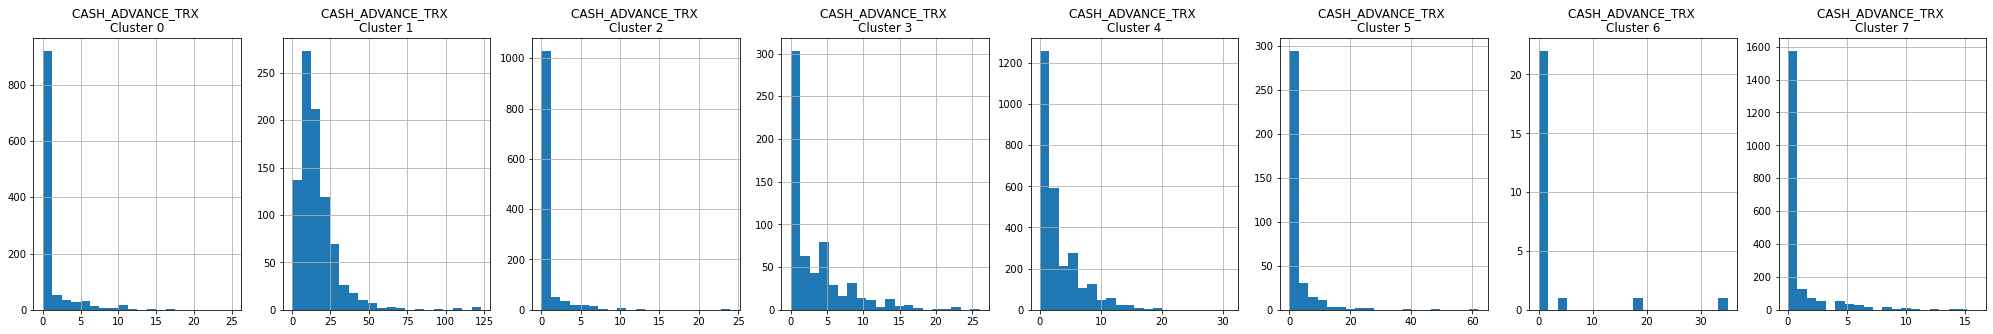

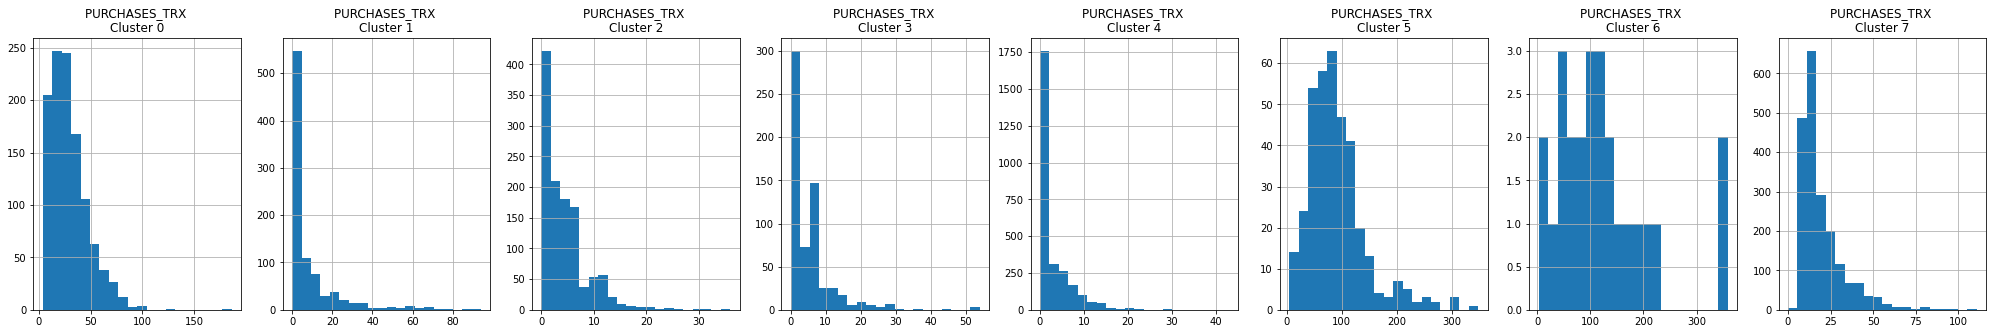

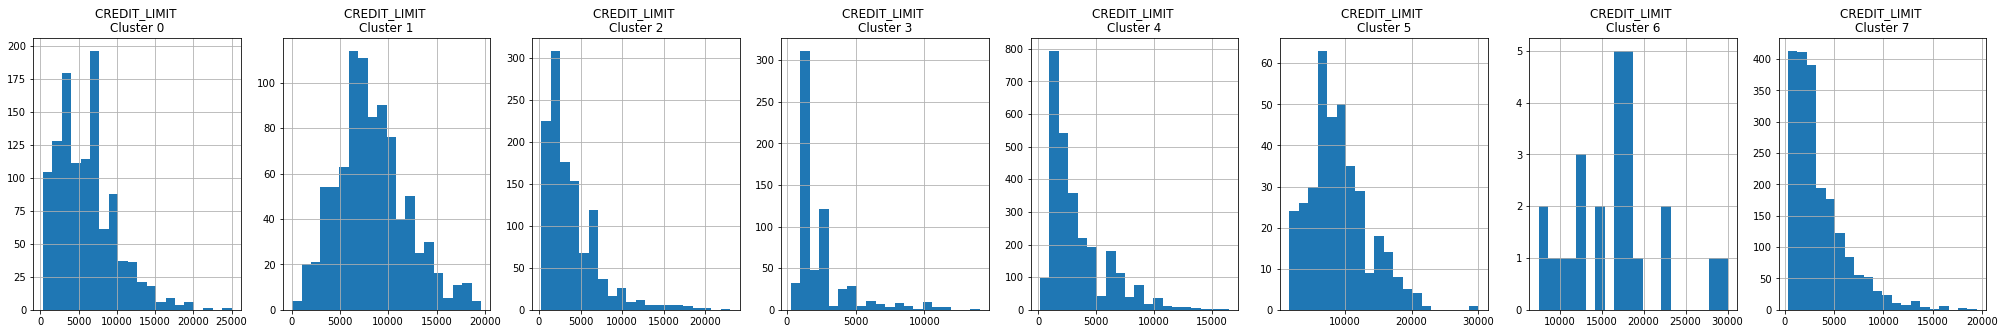

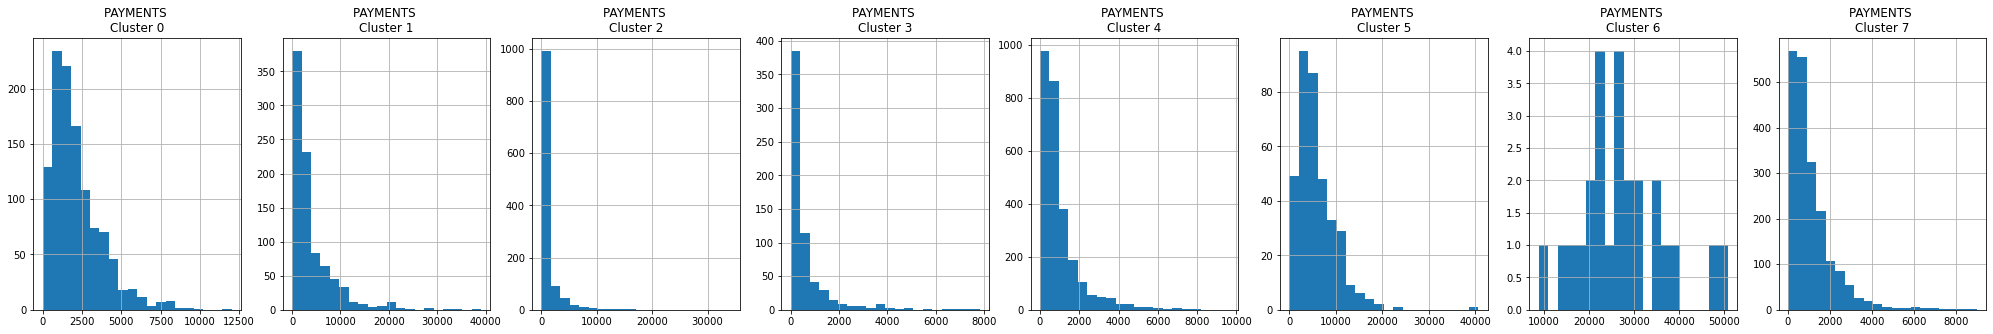

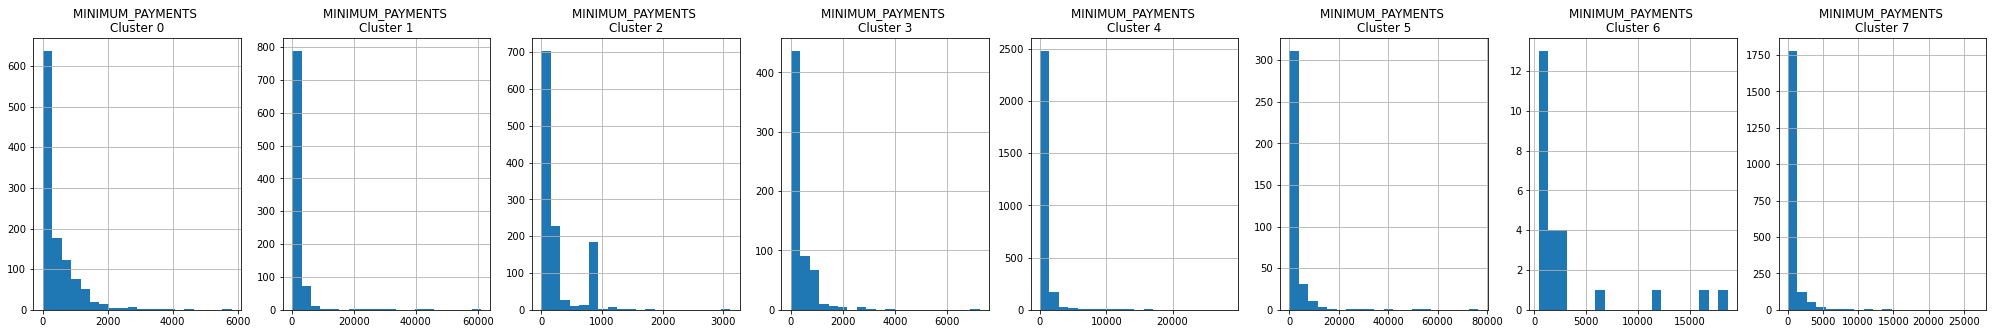

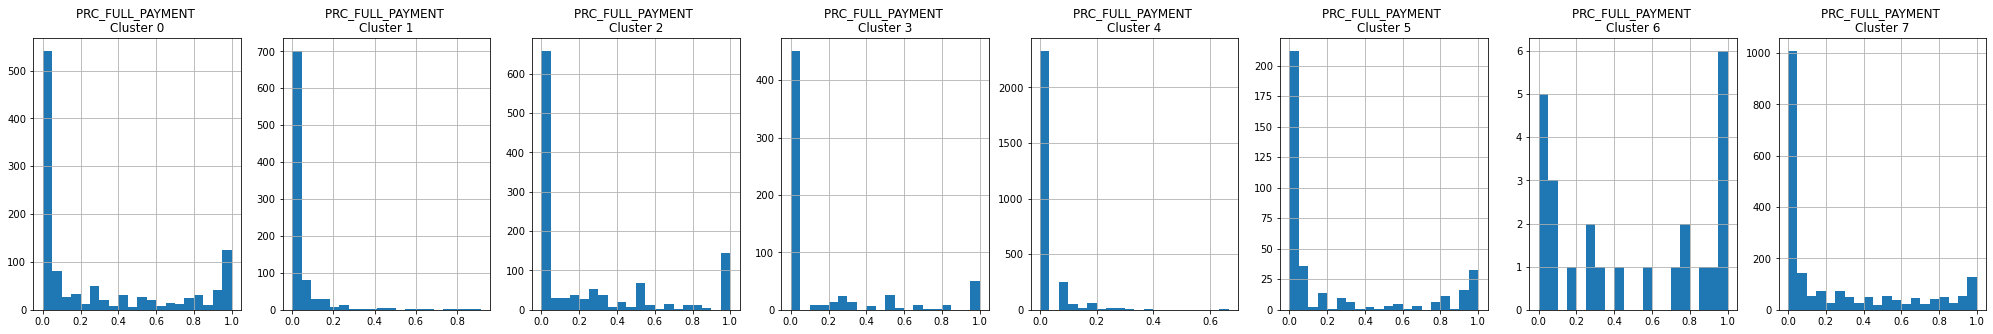

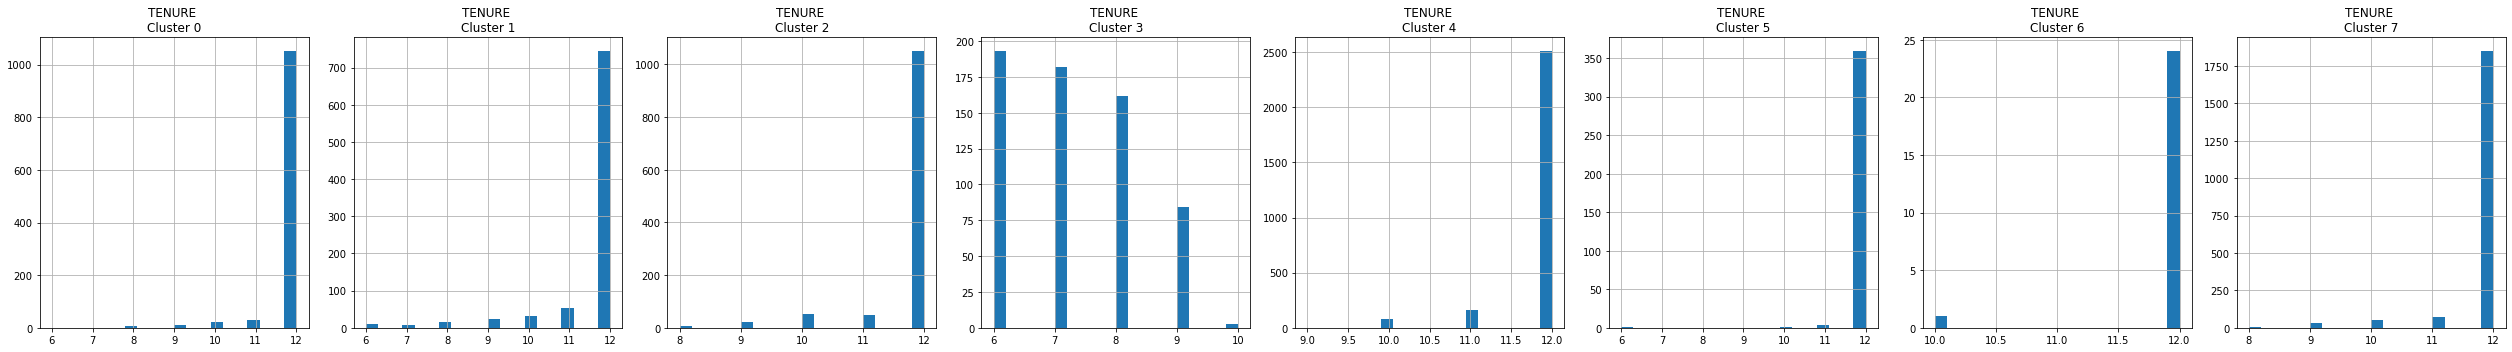

In [109]:
for i in df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} \nCluster {j}')

plt.tight_layout()
plt.show()

**Para confirmar nossos insights feitos acima, podemos usar esses histogramas para confirmar o que analisamos e talvez gerar novos insights através dos gráficos. Novamente, recomnda-se que alguém da área de acompanhe a análise.**

## Vamos ordenar e salvar a base de dados

In [112]:
df_ordered = df_cluster.sort_values(by = 'cluster')

In [113]:
df_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4979,2220.864979,1.0,2884.42,1327.83,1556.59,0.0,0.750000,0.583333,0.666667,0.0,0,46,4500.0,1355.527973,555.596549,0.000000,12,0
1702,2391.214539,1.0,4186.49,3313.00,873.49,0.0,1.000000,0.916667,0.916667,0.0,0,50,4000.0,2710.981980,561.918093,0.000000,12,0
5619,672.847330,1.0,1969.47,1796.79,172.68,0.0,0.500000,0.400000,0.100000,0.0,0,7,5500.0,1204.587035,238.195134,0.100000,10,0
4142,520.441499,1.0,2170.60,2170.60,0.00,0.0,0.666667,0.666667,0.000000,0.0,0,20,1500.0,1943.742193,179.996275,0.083333,12,0
4146,2015.554911,1.0,1446.48,493.88,952.60,0.0,0.666667,0.250000,0.666667,0.0,0,27,13000.0,4537.716739,563.638570,0.000000,12,0


In [114]:
df_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2144,139.449391,0.727273,843.03,0.00,843.03,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2200.0,1312.375596,179.548143,0.000000,12,7
2140,3932.482783,1.000000,1674.11,649.00,1025.11,0.000000,1.000000,0.333333,1.000000,0.000000,0,43,11500.0,1166.117797,954.241960,0.000000,12,7
4150,3063.422164,0.727273,1646.48,555.73,1090.75,2934.748266,0.833333,0.333333,0.833333,0.166667,5,28,4500.0,6543.279871,2016.241260,0.000000,12,7
7188,3015.597547,1.000000,586.77,101.40,485.37,1726.922555,1.000000,0.083333,1.000000,0.250000,7,31,3400.0,1472.730273,1090.525368,0.000000,12,7
4980,92.325796,1.000000,371.16,0.00,371.16,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2000.0,205.804949,170.367631,0.166667,12,7


In [115]:
df_ordered.to_csv('cluster.csv')

## Principal Component Analysis (PCA)

- PCA é um algoritmo de aprendizagem não supervisionada.
- Aplica redução de dimensionalidade, porém, tenta manter as informações originais com as mesmas características.
- Encontra um novo conjunto de características que são chamados de componentes.
- Os componentes são criados por meio das características **não** correlacionais.

**Aplicação do PCA**

In [116]:
pca = PCA(n_components=2)

principal_component = pca.fit_transform(scaled_df)
principal_component

array([[-1.68222085, -1.07645089],
       [-1.13829527,  2.50648199],
       [ 0.96968445, -0.38351716],
       ...,
       [-0.92620433, -1.81078823],
       [-2.33655215, -0.65796981],
       [-0.55642082, -0.40046655]])

In [117]:
df_pca = pd.DataFrame(data=principal_component, columns=['pca1', 'pca2'])
df_pca.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138295,2.506482
2,0.969684,-0.383517
3,-0.873628,0.043164
4,-1.599434,-0.688581


In [118]:
df_pca = pd.concat([df_pca, pd.DataFrame({'cluster': labels})], axis=1)
df_pca

,pca1,pca2,cluster
0,-1.682221,-1.076451,4
1,-1.138295,2.506482,1
2,0.969684,-0.383517,0
3,-0.873628,0.043164,4
4,-1.599434,-0.688581,4
...,...,...,...
8945,-0.359630,-2.016147,3
8946,-0.564370,-1.639130,3
8947,-0.926204,-1.810788,3
8948,-2.336552,-0.657970,3


In [122]:
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']

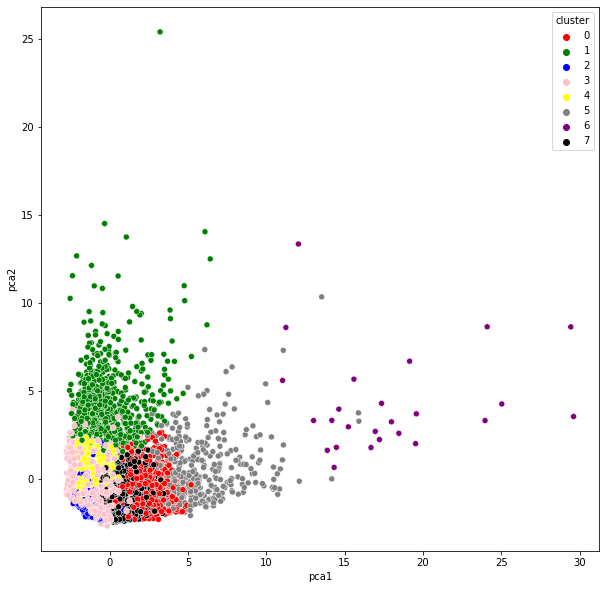

In [123]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = df_pca, palette = colors);

## Autoencoders - Intuição

- Autoenconders faz o contrário do PCA, no PCA os componentes são criados por meio das características **não** correlacionais, no autoencoders é o contrário.

- Funcionam se existir correlação entre os dados de entrada (resultados ruins se os dados de entrada são todos independentes)

- São um tipo de redes neurais artificiais para codificar dados

- Utiliza a mesma entrada e a mesma saída para comparar os resultados

**Aplicação de autoencoders**

- Vamos reduzir a dimensionalidade de 17 para 10,
- Elbow Method,
- K-Means
- PCA

In [124]:
scaled_df.shape

(8950, 17)

In [127]:
# 17 → 500 → 2000 → 10 → 2000 → 500 → 17

input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

**Autoencoder**

In [128]:
autoencoder = Model(input_df, decoded)

In [129]:
# aqui nós vamos pegar apenas a parte codificada
encoder = Model(input_df, encoded)

In [132]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [133]:
# os parâmetros são os mesmos porque nós comparamos a saída com a entrada
autoencoder.fit(scaled_df, scaled_df, epochs=50)

Epoch 1/50
280/280 [==============================] - 11s 35ms/step - loss: 0.1925
Epoch 2/50
280/280 [==============================] - 12s 41ms/step - loss: 0.0848
Epoch 3/50
280/280 [==============================] - 11s 38ms/step - loss: 0.0417
Epoch 4/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0521
Epoch 5/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0458
Epoch 6/50
280/280 [==============================] - 11s 38ms/step - loss: 0.0418
Epoch 7/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0266
Epoch 8/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0353
Epoch 9/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0300
Epoch 10/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0214
Epoch 11/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0197
Epoch 12/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0195
Epoch 

In [134]:
scaled_df.shape

(8950, 17)

In [135]:
compact = encoder.predict(scaled_df)

In [137]:
compact.shape

(8950, 10)

In [138]:
scaled_df[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [140]:
compact[0]

array([0.46974432, 0.66497064, 1.3955916 , 0.11050922, 0.        ,
       0.23913127, 0.        , 0.5271472 , 0.33454037, 0.7172972 ],
      dtype=float32)

In [141]:
wcss2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss2.append(kmeans.inertia_)

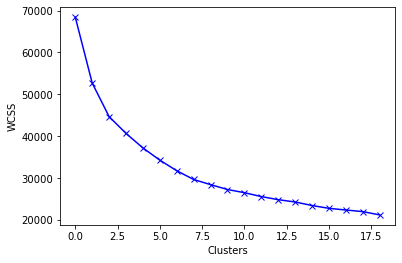

In [143]:
plt.plot(wcss2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

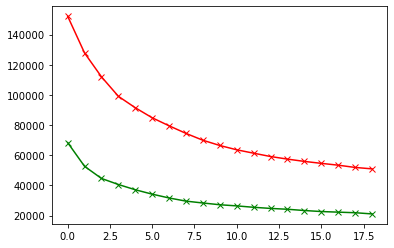

In [145]:
plt.plot(wcss1, 'bx-', color='r')
plt.plot(wcss2, 'bx-', color='g');

In [146]:
kmeans = KMeans(n_clusters=4).fit(compact)

In [148]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 1, 1, ..., 0, 0, 2]), (8950,))

In [149]:
df_clusterAE = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

In [150]:
df_clusterAE.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [151]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)

In [153]:
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.227433,-0.078617
1,-0.356862,1.135718
2,-0.194003,-0.491953
3,0.652053,0.264559
4,-1.317209,-0.148023


In [154]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

In [155]:
pca_df.head()

,pca1,pca2,cluster
0,-1.227433,-0.078617,1
1,-0.356862,1.135718,1
2,-0.194003,-0.491953,1
3,0.652053,0.264559,0
4,-1.317209,-0.148023,1


In [157]:
colors = ['red', 'green', 'blue', 'pink']

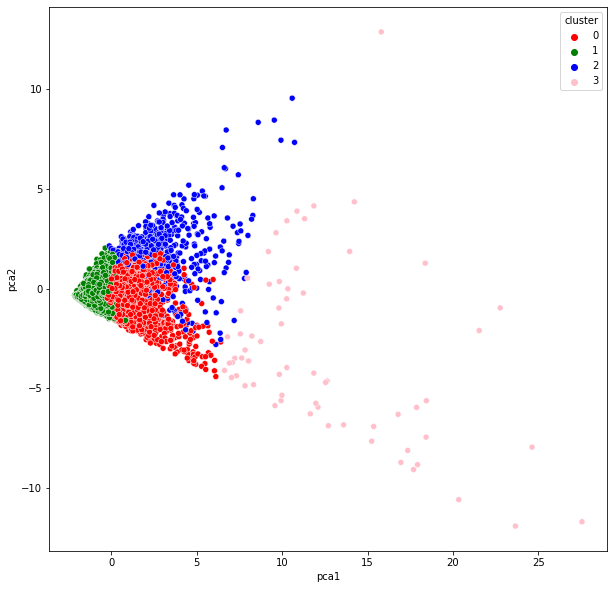

In [159]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = colors);

In [160]:
df_cluster_ordered = df_clusterAE.sort_values(by = 'cluster')
df_cluster_ordered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6979,14.371243,0.363636,294.28,0.00,294.28,0.000000,0.333333,0.000000,0.250000,0.000000,0,8,2500.0,506.189083,124.313354,0.500000,12,0
3962,3.141961,0.181818,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,656.045331,120.437462,1.000000,12,0
5673,2648.784405,1.000000,6697.57,5281.17,1416.40,0.000000,0.916667,0.916667,1.000000,0.000000,0,65,8200.0,2984.805450,678.731919,0.000000,12,0
1863,7.031420,0.454545,502.33,424.00,78.33,0.000000,0.416667,0.166667,0.166667,0.000000,0,5,2500.0,844.120402,25.455716,0.000000,12,0
7479,124.743322,0.636364,1007.45,0.00,1007.45,0.000000,0.583333,0.000000,0.583333,0.000000,0,14,2500.0,1616.540779,146.493501,1.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,2774.249582,1.000000,21802.60,21802.60,0.00,1771.824164,1.000000,1.000000,0.000000,0.083333,4,72,13000.0,22350.292470,562.887574,0.916667,12,3
3788,4199.989868,1.000000,11653.14,6884.60,4768.54,0.000000,0.916667,1.000000,0.916667,0.000000,0,84,16500.0,13660.241200,1056.912965,0.000000,12,3
3093,6773.941979,1.000000,14215.00,14215.00,0.00,464.795495,0.583333,0.583333,0.000000,0.083333,1,30,9000.0,5773.661106,6338.527589,0.000000,12,3
7132,9024.812044,1.000000,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.618600,0.000000,12,3


In [162]:
df_cluster_ordered.to_csv('autoencoder_cluster.csv')